In [49]:
import csv
import numpy as np
from random import *
from math import *
import matplotlib.pyplot as plt

In [47]:


def read_csv_and_calculate_distance(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)

    data = [['X', 'Y']] + data
    data_array = np.array(data)
    coordinates = data_array[1:].astype(float)

    num_cities = len(coordinates)
    distance_matrix = np.zeros((num_cities, num_cities))

    for i in range(num_cities):
        for j in range(i + 1, num_cities):
            distance = np.linalg.norm(coordinates[i] - coordinates[j])
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance

    return distance_matrix, coordinates

def swap_positions(city_list, pos1, pos2):
    city_list[pos1], city_list[pos2] = city_list[pos2], city_list[pos1]
    return city_list

def generate_initial_solution(num_cities):
    initial_solution = sample(range(2, num_cities + 1), num_cities - 1)
    initial_solution.insert(0, 1)
    initial_solution.append(1)
    return initial_solution

def calculate_energy(solution, distance_matrix):
    energy = 0
    num_cities = len(solution)
    for i in range(num_cities):
        energy += distance_matrix[solution[i] - 1][solution[(i + 1) % num_cities] - 1]
    return energy

def generate_neighbor(solution):
    neighbor = solution[:]
    x = randint(2, len(solution))
    y = randint(2, len(solution))
    neighbor = swap_positions(neighbor, x - 1, y - 1)
    return neighbor

def simulated_annealing(distance_matrix, initial_temperature, final_temperature, cooling_rate):
    num_cities = len(distance_matrix)
    current_solution = generate_initial_solution(num_cities)
    best_solution = current_solution[:]
    current_temperature = initial_temperature

    while current_temperature > final_temperature:
        neighbor_solution = generate_neighbor(current_solution)
        delta_energy = calculate_energy(neighbor_solution, distance_matrix) - calculate_energy(current_solution, distance_matrix)

        if delta_energy <= 0 or random() <= exp(-delta_energy / current_temperature):
            current_solution = neighbor_solution[:]

        if calculate_energy(neighbor_solution, distance_matrix) < calculate_energy(best_solution, distance_matrix):
            best_solution = neighbor_solution[:]

        current_temperature *= cooling_rate

    return best_solution

def main():
    file_path = 'tiny.csv'  
    distance_matrix, _ = read_csv_and_calculate_distance(file_path)

    initial_temperature = 10000.0
    final_temperature = 1.0
    cooling_rate = 0.999

    optimal_solution = simulated_annealing(distance_matrix, initial_temperature, final_temperature, cooling_rate)

    print("The optimal solution is:", optimal_solution, "with a total distance of:", calculate_energy(optimal_solution, distance_matrix))

if __name__ == "__main__":
    main()


The optimal solution is: [1, 1, 4, 10, 7, 8, 3, 9, 6, 2, 5] with a total distance of: 12.516978039789697


In [67]:
def test_cooling_rates(distance_matrix, initial_temperature, final_temperature, cooling_rates):
    energy_results = []
    for cooling_rate in cooling_rates:
        # Appliquer le recuit simulé avec le taux de refroidissement actuel
        optimal_solution = simulated_annealing(distance_matrix, initial_temperature, final_temperature, cooling_rate)
        energy = calculate_energy(optimal_solution, distance_matrix)
        energy_results.append(energy)
        
    return energy_results

def plot_cooling_rate_effect(cooling_rates, energy_results):
    plt.scatter(cooling_rates, energy_results, marker='o', color='firebrick', label='Energy', alpha=0.7)
    plt.xlabel('Cooling Rate')
    plt.ylabel('Energy')
    plt.title('Effect of Cooling Rate on Energy for 10 cities')
    plt.grid(True)
    plt.savefig('cooling_rate_effect.png')
    plt.show()

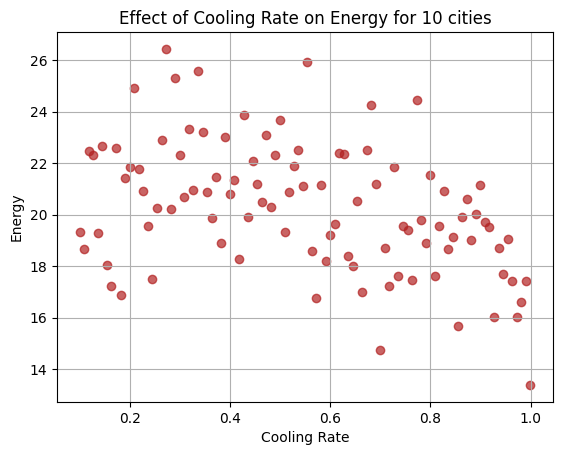

In [84]:
def main():
    # Paramètres de l'algorithme et valeurs de test du taux de refroidissement
    initial_temperature = 100.0
    final_temperature = 5
    cooling_rates = np.linspace(0.1, 0.9999, 100)

    file_path = 'tiny.csv'

    # Lecture des données et calcul de la matrice de distance
    distance_matrix, _ = read_csv_and_calculate_distance(file_path)

    # Test des différents taux de refroidissement
    energy_results = test_cooling_rates(distance_matrix, initial_temperature, final_temperature, cooling_rates)

    # Tracé de l'effet du taux de refroidissement sur l'énergie
    plot_cooling_rate_effect(cooling_rates, energy_results)

if __name__ == "__main__":
    main()

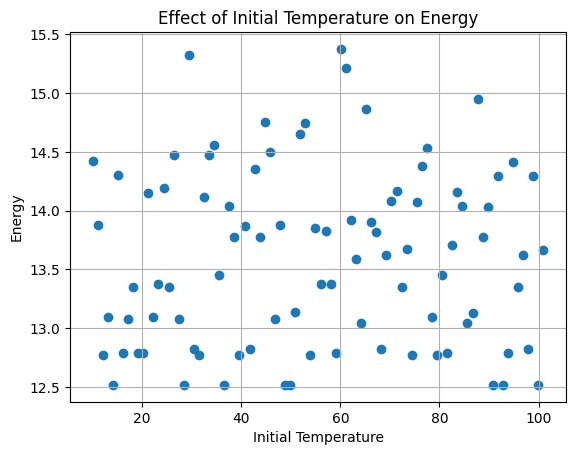

In [83]:


def test_initial_temperatures(distance_matrix, initial_temperatures, final_temperature, cooling_rate):
    energy_results = []
    for initial_temperature in initial_temperatures:
        # Appliquer le recuit simulé avec la température initiale actuelle
        optimal_solution = simulated_annealing(distance_matrix, initial_temperature, final_temperature, cooling_rate)
        energy = calculate_energy(optimal_solution, distance_matrix)
        energy_results.append(energy)
    return energy_results

def plot_initial_temperature_effect(initial_temperatures, energy_results):
    plt.scatter(initial_temperatures, energy_results, marker='o')
    plt.xlabel('Initial Temperature')
    plt.ylabel('Energy')
    plt.title('Effect of Initial Temperature on Energy')
    plt.grid(True)
    plt.savefig('initial_temperature_effect.png')
    plt.show()

def main():
    # Paramètres de l'algorithme et valeurs de test de la température initiale
    final_temperature = 1.0
    cooling_rate = 0.999
    initial_temperatures = np.linspace(10, 101, 90)

    file_path = 'tiny.csv'

    # Lecture des données et calcul de la matrice de distance
    distance_matrix, _ = read_csv_and_calculate_distance(file_path)


    # Test des différentes températures initiales
    energy_results = test_initial_temperatures(distance_matrix, initial_temperatures, final_temperature, cooling_rate)

    # Tracé de l'effet de la température initiale sur l'énergie
    plot_initial_temperature_effect(initial_temperatures, energy_results)

if __name__ == "__main__":
    main()
